In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [18]:
path = r'/Users/tilemmerichs/Desktop/Insta Basket Analysis'

In [3]:
#Import Dataframe
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_ords_prods.pkl'))

In [4]:
ords_prods_merge.shape

(32404859, 16)

In [5]:
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,Busiest_days,busiest_period_of_day
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Average orders
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Second least busy,Average orders
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Second least busy,Most orders
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Average orders
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Most orders


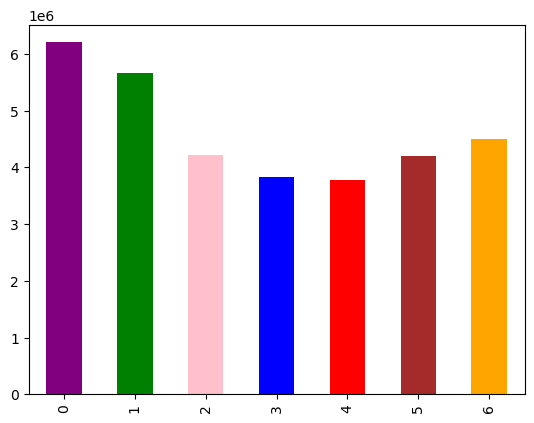

In [17]:
#Creating Bar Charts
bar = ords_prods_merge['orders_day_of_the_week'].value_counts().sort_index().plot.bar(color = ['purple', 'green', 'pink', 'blue', 'red', 'brown', 'orange'])

In [19]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

<AxesSubplot:ylabel='Frequency'>

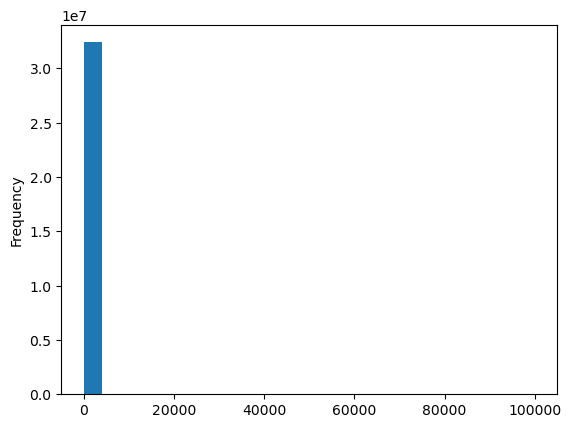

In [21]:
#Creating Histograms
ords_prods_merge['prices'].plot.hist(bins=25)

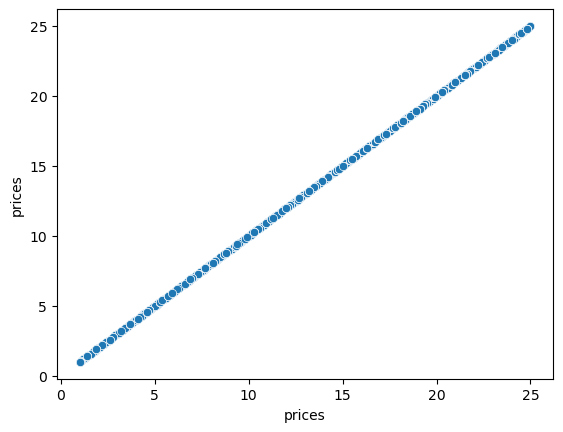

In [39]:
scatter = sns.scatterplot(x='prices', y='prices', data=ords_prods_merge)

In [40]:
scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatterplot.png'))

In [26]:
#Outlier Check
ords_prods_merge.loc[ords_prods_merge['prices']>100]

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range,Busiest_days,busiest_period_of_day


In [25]:
ords_prods_merge.loc[ords_prods_merge['prices']>100, 'prices'] = np.nan

In [27]:
ords_prods_merge['prices'].max()

25.0

<AxesSubplot:ylabel='Frequency'>

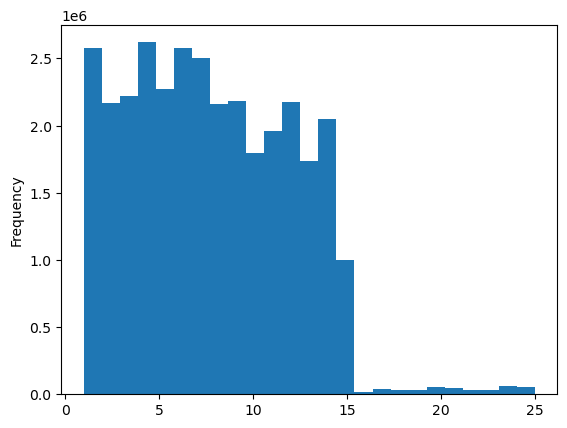

In [28]:
ords_prods_merge['prices'].plot.hist(bins=25)

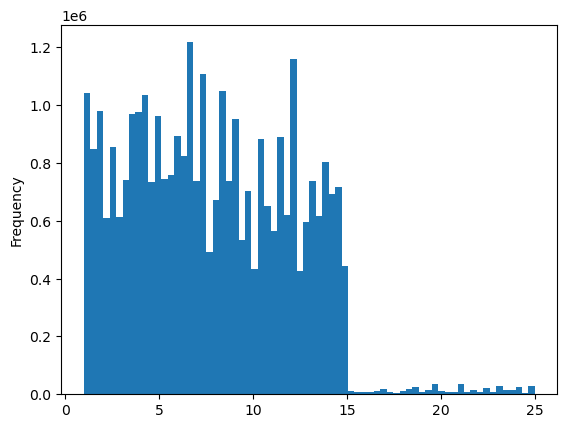

In [30]:
#Increase granularity
hist= ords_prods_merge['prices'].plot.hist(bins=70)

In [31]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

In [32]:
#Creating a random sample
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [33]:
#Giving the sample a variable
big = ords_prods_merge[dev]
small = ords_prods_merge[~dev]

In [34]:
len(ords_prods_merge)

32404859

In [35]:
len(big) + len (small)

32404859

In [36]:
#Create the dataframe of the sample with the important columns
df_2 = small[['prices', 'orders_day_of_the_week']]

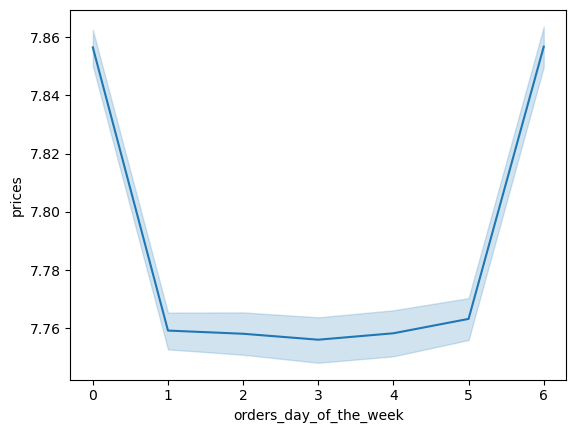

In [37]:
#Create a line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_the_week', y = 'prices')

In [38]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_prices.png'))